Multivariable Regression - NYC Crimes 2013

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('nyc_offenses_2013.xls')

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
df.fillna(value=0,inplace=True)

In [5]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,0.0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,0.0,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,0.0,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,0.0,30,227,526,4090,705,3243,142,0.0
4,Albion Village,6388,23,0,0.0,3,4,16,223,53,165,5,0.0


In [6]:
df.rename(columns={'Murder and\nnonnegligent\nmanslaughter':'Murder'}, inplace=True)

In [7]:
df.columns

Index(['City', 'Population', 'Violent\ncrime', 'Murder',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [8]:
df['Population_sq'] = df['Population']*df['Population']

In [9]:
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population_sq
0,Adams Village,1861,0,0,0.0,0,0,0,12,2,10,0,0.0,3463321
1,Addison Town and Village,2577,3,0,0.0,0,0,3,24,3,20,1,0.0,6640929
2,Akron Village,2846,3,0,0.0,0,0,3,16,1,15,0,0.0,8099716
3,Albany,97956,791,8,0.0,30,227,526,4090,705,3243,142,0.0,9595377936
4,Albion Village,6388,23,0,0.0,3,4,16,223,53,165,5,0.0,40806544


In [10]:
df.Murder[df.Murder>0] = 1
df.Robbery[df.Robbery>0] = 1

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population_sq
0,Adams Village,1861,0,0,0.0,0,0,0,12,2,10,0,0.0,3463321
1,Addison Town and Village,2577,3,0,0.0,0,0,3,24,3,20,1,0.0,6640929
2,Akron Village,2846,3,0,0.0,0,0,3,16,1,15,0,0.0,8099716
3,Albany,97956,791,1,0.0,30,1,526,4090,705,3243,142,0.0,9595377936
4,Albion Village,6388,23,0,0.0,3,1,16,223,53,165,5,0.0,40806544


In [12]:
df.dtypes

City                             object
Population                        int64
Violent\ncrime                    int64
Murder                            int64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2       int64
Robbery                           int64
Aggravated\nassault               int64
Property\ncrime                   int64
Burglary                          int64
Larceny-\ntheft                   int64
Motor\nvehicle\ntheft             int64
Arson3                          float64
Population_sq                     int64
dtype: object

In [13]:
df.describe()

,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population_sq
count,3.480000e+02,348.000000,348.000000,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02
mean,4.003763e+04,201.594828,0.140805,0.0,5.864943,0.600575,121.261494,792.606322,119.683908,637.017241,35.905172,1.005747,2.035547e+11
std,4.500374e+05,2815.268504,0.348321,0.0,60.425452,0.490486,1706.131730,7659.724746,924.948789,6346.054451,403.423826,7.884612,3.778876e+12
min,5.260000e+02,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05
25%,3.003000e+03,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000,9.018117e+06
50%,7.233500e+03,6.000000,0.000000,0.0,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000,5.232568e+07
75%,1.842750e+04,22.000000,0.000000,0.0,2.000000,1.000000,14.000000,341.000000,51.250000,287.250000,7.000000,0.000000,3.397536e+08
max,8.396126e+06,52384.000000,1.000000,0.0,1112.000000,1.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000,7.049493e+13


In [14]:
df.Population.describe()

count    3.480000e+02
mean     4.003763e+04
std      4.500374e+05
min      5.260000e+02
25%      3.003000e+03
50%      7.233500e+03
75%      1.842750e+04
max      8.396126e+06
Name: Population, dtype: float64

Text(0,0.5,'Population')

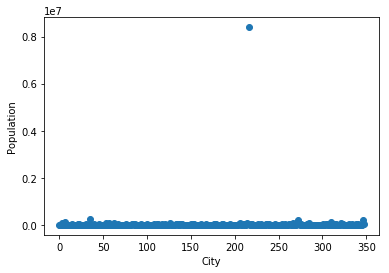

In [15]:
plt.scatter(x=df.index, y="Population", data=df)
plt.xlabel('City')
plt.ylabel('Population')

In [23]:
df = df[df.City != 'New York']

In [24]:
df.Population.describe()

count       347.000000
mean      15956.685879
std       27080.218837
min         526.000000
25%        2997.000000
50%        7187.000000
75%       18160.500000
max      258789.000000
Name: Population, dtype: float64

Text(0,0.5,'Population')

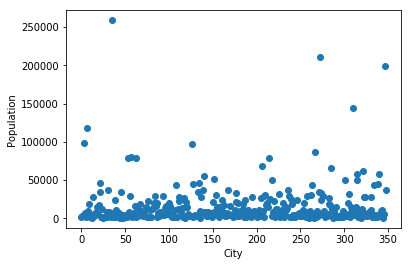

In [25]:
plt.scatter(x=df.index, y="Population", data=df)
plt.xlabel('City')
plt.ylabel('Population')